In [2]:
import numpy as np

### Q7

In [62]:
# (7a)
def perceptron(w, b, x):
  return np.sign(np.dot(w.flatten(), x.flatten()) + b)

def has_converged(w, b, X, l):
  return np.allclose(np.sign(X @ w + b).flatten(), l.flatten())

MAX_ITERS = 72

def train(X, l):
  # data: n x d, labels: n
  n, d = X.shape
  assert(l.shape == (n,))

  w = np.zeros((d, 1))
  b = 0

  num_updates = 0

  for i in range(MAX_ITERS):
    permutation = np.random.choice(range(n), n, replace=False)
    X_perm = X[permutation]
    l_perm = l[permutation]

    for j in range(n):
      x_j = X_perm[[j],:]
      l_j = l_perm[j]
      if perceptron(w, b, x_j) != l_j:
        num_updates += 1
        w = w + l_j * x_j.reshape((-1, 1))
        b += l_j

    if has_converged(w, b, X_perm, l_perm):
      break

  return w, b, num_updates


In [100]:
# (7b, 7c)

from sklearn import datasets
iris = datasets.load_iris()
X0 = iris.data
y0 = iris.target

print(X0.shape, y0.shape)

rows = np.array(np.nonzero(y0 <= 1)[0])

X_1 = X0[rows.reshape((-1, 1)),(1,3)]
y_1 = np.where(y0[rows] == 0, -1, 1)

print(X_1.shape, y_1.shape)

(150, 4) (150,)
(100, 2) (100,)


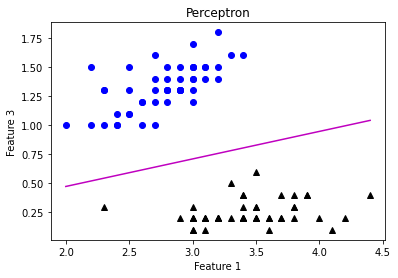

In [108]:
import matplotlib.pyplot as plt

# (7c)
np.random.seed(123)
w, b, num_updates = train(X_1, y_1)

def plot(w, b, X, l, draw_line = True, title = "Perceptron"):
  w1, w2 = w.flatten()
  x_min, x_max = np.min(X[:,0]), np.max(X[:,0])
  line_x = np.linspace(x_min, x_max, 100)
  # w1x + w2y + b = 0
  # y = -w1/w2 x - b / w2
  line_y = - w1 / w2 * line_x - b / w2


  plt.plot(X[l==-1,0], X[l==-1,1], "^k")
  plt.plot(X[l==1,0], X[l==1,1], "ob")
  if draw_line:
    plt.plot(line_x, line_y, "-m")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 3")
  plt.title(title)

plot(w, b, X_1, y_1)

Average number of updates: 258/20=12.9


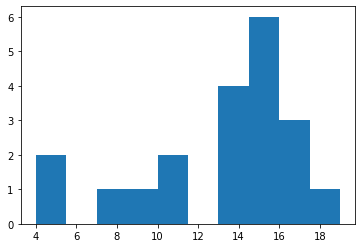

In [102]:
np.random.seed(1337)
n_trials = 20
updates = []
for i in range(n_trials):
  _, _, n_i = train(X_1, y_1)
  updates.append(n_i)
total_updates = sum(updates)
print(f"Average number of updates: {total_updates}/{n_trials}={total_updates / n_trials}")
plt.hist(updates);

### Q8

(150, 4) (150,)
(100, 2) (100,)
The data is NOT linearlly seperable


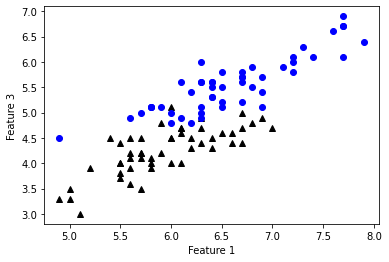

In [110]:
rows_2 = np.array(np.nonzero(y0 > 0)[0])
X_2 = X0[rows_2.reshape((-1, 1)),(0, 2)]
y_2 = np.where(y0[rows_2] == 1, -1, 1)

print(X0.shape, y0.shape)
print(X_2.shape, y_2.shape)

plot(np.ones((2, 1)), 1, X_2, y_2, draw_line = False, title = None)

print("The data is NOT linearly seperable")